<a href="https://colab.research.google.com/github/techshot25/GraduateAdmissions/blob/master/GraduateAdmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admissions
### By Ali Shannon
In this project, I will derive a model that predicts the chance of getting admitted into a Masters program at UCLA.

These are the columns that will be considered as features:

    1. GRE Score for all students
    2. TOEFL Score for international students
    3. University Rating undergradaute university rating.
    4. SOP or Statement of Purpose rating.
    5. LOR or Letter Of Recommendation rating.
    6. CGPA cumulative GPA out of 10
    7. Research whether or not they have research experience.
    
And the last column is the `chance of admission` for each student.

I intend to write a regression model that predicts the chance of admission based on the features provided above.

### Acknowledgements

This data was provided by [Kaggle.com](https://www.kaggle.com/mohansacharya/graduate-admissions/home). Check out their datasets and competitions for practice with data analysis and machine learning.

### Citation
_Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019._

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

df = pd.read_csv('Admission_Predict.csv') # import the CSV to a dataframe

df.head() # show the first five columns

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# Drop unused columns
df = df.drop(columns = ['Serial No.'])

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Statistics
Let's look at the score distributions for students with and without research experience.

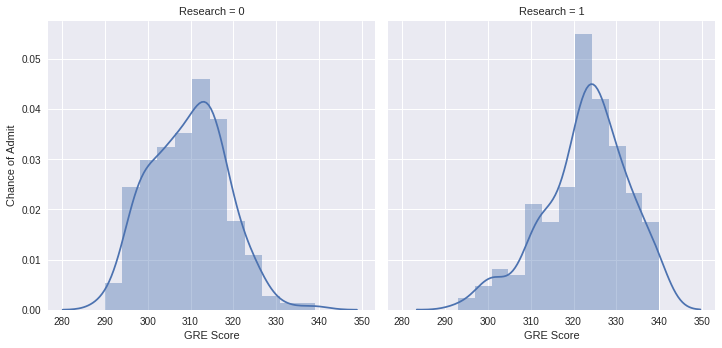

In [3]:
g = sns.FacetGrid(df, col="Research",  size= 5, sharey=True, sharex = True)
g.map(sns.distplot, "GRE Score");
g.set_axis_labels("GRE Score", "Chance of Admit");

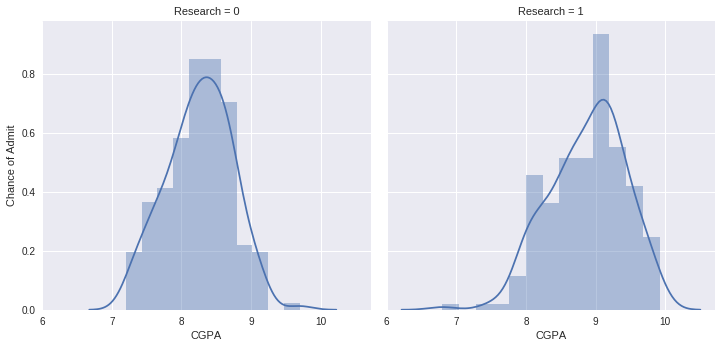

In [4]:
g = sns.FacetGrid(df, col="Research", size= 5, sharey=True, sharex = True)
g.map(sns.distplot, "CGPA");
g.set_axis_labels("CGPA", "Chance of Admit");

It should be apparent now that the students with research experience have higher CGPA and GRE scores.

Now we check if the data is far too correlated.

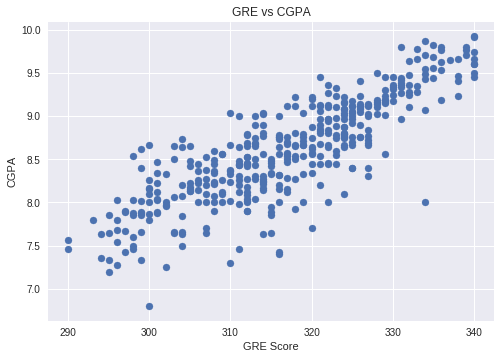

In [5]:
plt.scatter(df['GRE Score'], df['CGPA']);
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('GRE vs CGPA')
plt.show()

This appears to be highly correlated, but since the correlation coefficient is not over 0.9 we can safely assume that all of these colums are useful for machine learning training.  

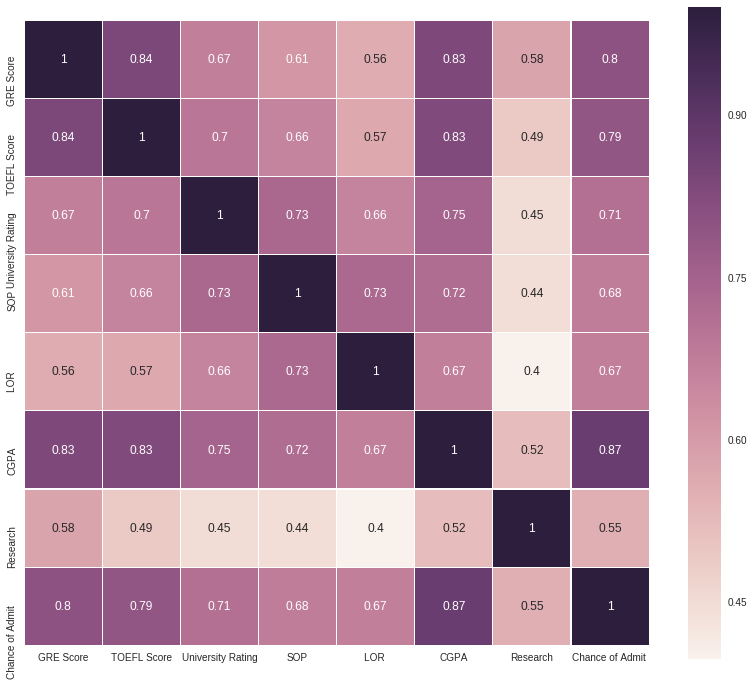

In [6]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(df.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

### Regression Analysis

Since we have a multidimentional analysis, it will be far too difficult to visualize how the model will approach decision solution.

In [0]:
X = df[df.columns[:-1]] # features
y = df[df.columns[-1]] # classifier as a percentage

test = pd.read_csv('Admission_Predict_Ver1.1.csv') # import testing data
test = test.drop(columns = ['Serial No.'])
X_test = test[test.columns[:-1]] # testing features
y_test = test[test.columns[-1]] # testing classifiers

In [8]:
from sklearn import linear_model # only a linear model will be considered

lr = linear_model.LinearRegression().fit(X, y)

lr_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression MSE: %.2f" % mean_squared_error(y_test, lr_pred))

print('Variance score: %.2f' % r2_score(y_test, lr_pred))

Linear Regression MSE: 0.00
Variance score: 0.82


In [9]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X, y)

rfr_pred = rfr.predict(X_test)

print("Random Forest Regressor MSE: %.2f" % mean_squared_error(y_test, rfr_pred))

print('Variance score: %.2f' % r2_score(y_test, rfr_pred))

Random Forest Regressor MSE: 0.00
Variance score: 0.95


In [10]:
br = linear_model.BayesianRidge().fit(X, y)

br_pred = br.predict(X_test)

print("Bayesian Ridge MSE: %.2f" % mean_squared_error(y_test, br_pred))

print('Variance score: %.2f' % r2_score(y_test, br_pred))

Bayesian Ridge MSE: 0.00
Variance score: 0.82


In [11]:
rr = linear_model.Ridge(alpha=.5).fit(X, y)

rr_pred = rr.predict(X_test)

print("Ridge Regression MSE: %.2f" % mean_squared_error(y_test, rr_pred))

print('Variance score: %.2f' % r2_score(y_test, rr_pred))

Ridge Regression MSE: 0.00
Variance score: 0.82


The Random Forest Regressor seems to have the best variance score of 0.95 which makes it a near perfect predictor for acceptance in a graduate program.